# Scanning documents using OpenCV

In this notebook, we will learn how to scan documents using OpenCV. 
We will use the following steps:

## 1. Setup:
---
First off we have to install the required packages and import them. We will use the following packages: <br>
  * Opencv to perform out image processing tasks
  * Pillow and IPython show our images 

Then we test if they are installed correctly by printing the version of the packages.
If everything is installed correctly, we can start with the next step.


In [33]:
import cv2
import numpy as np
from PIL import Image
from IPython.display import display

print(f"OpenCV version:  {cv2.__version__}")
print(f"Pillow version:  {Image.__version__}")
!jupyter --version

OpenCV version:  4.6.0
Pillow version:  9.0.1
Selected Jupyter core packages...
IPython          : 8.5.0
ipykernel        : 6.15.2
ipywidgets       : 8.0.2
jupyter_client   : 7.3.5
jupyter_core     : 5.1.0
jupyter_server   : 1.23.3
jupyterlab       : not installed
nbclient         : 0.7.2
nbconvert        : 7.2.5
nbformat         : 5.7.0
notebook         : 6.5.2
qtconsole        : 5.4.0
traitlets        : 5.3.0


## 2. Loading the images:
---
1. We load the `test.jpg` image using the `cv2.imread()` function.
*    The `cv2.imread()` reads a given file and returns a Matrix of color values into a variable named img, which is a numpy array. 
*    This matrix is a 3D matrix, where the first two dimensions are the height and width of the image and the third dimension is the color channel.
*    The color channel is a 3D vector, which contains the color values for the red, green and blue channel.
*    The color values are stored as 8 bit unsigned integers, which means that the values range from 0 to 255.
*    The image is loaded in the BGR color space, which means that the color values are stored in the order blue, green, red.
*    The `cv2.imread()` function has a second parameter, which specifies the color space in which the image should be loaded.
*    The default value is `cv2.IMREAD_COLOR`, which loads the image in the BGR color space.
*    If we want to load the image in the RGB color space, we have to set the second parameter to `cv2.IMREAD_COLOR`.
*    If we want to load the image in grayscale, we have to set the second parameter to `cv2.IMREAD_GRAYSCALE`.
*    But we will keep the image in the BGR color space for now so we can show how to convert colorspaces later....


> OpenCV also provides the imshow() function to display the image. However, this function is not supported in Jupiter notebook. So we use the display() function instead.

In [34]:
img = cv2.imread('./contract.jpg')
# Image taken from https://learnopencv.com/wp-content/uploads/2022/07/Original-Form-2.jpg on the 28th of November 2022

2. We convert the image to grayscale using the `cv2.cvtColor()` function.
*    The `cv2.cvtColor()` function converts the image from one color space to another.
*    The first parameter is the image, which should be converted.
*    The second parameter is the color space to which the image should be converted.
*    The color space is specified using the `cv2.COLOR_XX2XX` constant.
     *    In the example we convert the image from the BGR color space to the grayscale color space.
*    The `cv2.cvtColor()` function returns the converted image which we store in the `gray` variable.

In [35]:
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

3. We resize the image to a width of 600x800 using the `cv2.resize()` function, in order to better visualize it in the Jupiter notebook.
*    The `cv2.resize()` function has two parameters, the first one is the image and the second one is the new size of the image.
*    The new size of the image is a tuple, which contains the width and height of the image. In our case the width is 400 and the height is 600.
*    The `cv2.resize()` function returns a new image with the new size into the `resized` variable.

In [36]:
resized = cv2.resize(grey, (420, 560))


4. We then display the image using the `display()` function.
*    The `display()` function takes a numpy array as input and displays it as an image.
*    The `display()` function is a wrapper around the `Image.fromarray()` function from the Pillow package.
*    The `Image.fromarray()` function takes a numpy array as input and returns a Pillow image object.
*    The `IPython.display.display()` function then takes a Pillow image object as input and displays it.

> Please note that the display() function is part of the IPython package and not the OpenCV package.<br>
> The display() function is only available in the Jupiter notebook and not in the Python interpreter.

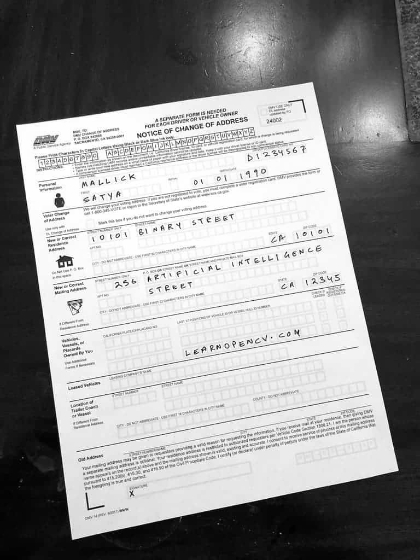

In [37]:
display(Image.fromarray(resized))

## 3. Preprocessing:
---
To be able to better work with the image, we have to preprocess it. We will use the following steps:

1. First we blur the image using the `cv2.GaussianBlur()` function. This will reduce the noise in the image and make it easier to detect the edges, which we will use later to find the corners of the document.
    *   The `cv2.GaussianBlur()` function takes three parameters, the first one is the image, the second one is the size of the kernel and the third one is the standard deviation in the x direction.
    *   As original image we use the grayscale image, which we created in the previous step in its original size.
    *   The size of the kernel is a tuple, which contains the width and height of the kernel. In our case the width is 5 and the height is 5.
        *   A kernel is a matrix, which is used to perform a convolution on the image. The bigger the kernel, the more the image will be blurred.
    *   The standard deviation in the x direction is a value, which specifies how much the kernel should be blurred in the x direction.
    *   We set the standard deviation in the x direction to 0, which means that the kernel will not be blurred in the x direction.
    *   The `cv2.GaussianBlur()` function returns a new image, which we store in the `blurred` variable.

We then display the image using the `display()` function.

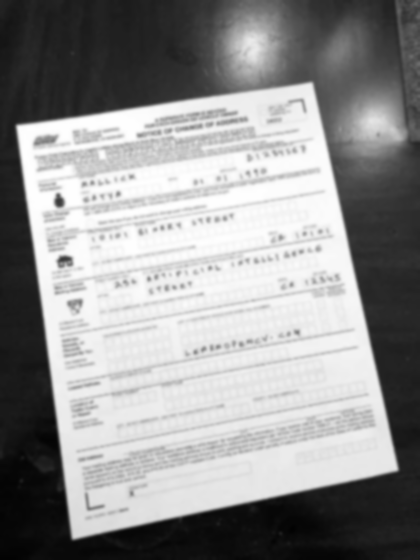

In [38]:
blurred = cv2.GaussianBlur(resized, (7, 7), 0)
display(Image.fromarray(blurred))

2. We then apply the Canny edge detection algorithm to the blurred image using the `cv2.Canny()` function. This will detect the edges in the image.
    *   The `cv2.Canny()` function takes three parameters, the first one is the image, the second one is the threshold for the minimum value and the third one is the threshold for the maximum value.
    *   As original image we use the blurred image, which we created in the previous step.
    *   The threshold for the minimum value is a value, which specifies the minimum value for an edge. In our case we set the minimum value to 75.
    *   The threshold for the maximum value is a value, which specifies the maximum value for an edge. In our case we set the maximum value to 200.
    *   The `cv2.Canny()` function returns a new image, which we store in the `edged` variable.
*  The Canny edge detection works as follows:
    *   First the image is blurred using a Gaussian blur.
    *   Then the gradient of the image is calculated in the x and y direction.
    *   Then the gradient is calculated in the x and y direction.
    *   Then the gradient is calculated in the x and y direction.
    *   Then the gradient is calculated

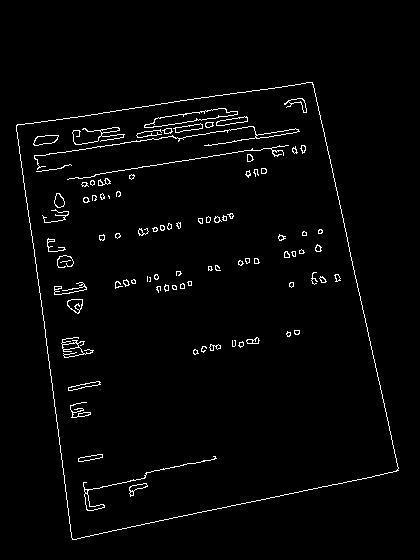

In [39]:
edged = cv2.Canny(blurred, 75, 200)
display(Image.fromarray(edged))

4. We then find the contours in the image using the `cv2.findContours()` function. This will find the contours in the image.
    *   The `cv2.findContours()` function takes three parameters, the first one is the image, the second one is the contour retrieval mode and the third one is the contour approximation method.
    *   As original image we use the dilated image, which we created in the previous step.
    *   The contour retrieval mode is a value, which specifies how the contours should be retrieved. In our case we set the contour retrieval mode to `cv2.RETR_LIST`.
    *   The contour approximation method is a value, which specifies how the contours should be approximated. In our case we set the contour approximation method to `cv2.CHAIN_APPROX_SIMPLE`.
    *   The `cv2.findContours()` function returns a tuple, which contains the contours and the hierarchy.
    *   The contours are stored in the `contours` variable.
    *   The hierarchy is stored in the `hierarchy` variable.

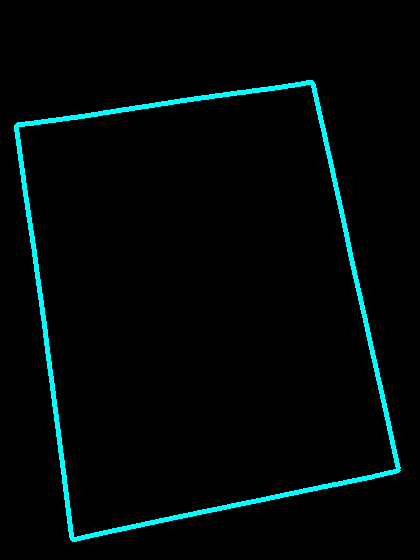

In [55]:
# Blank canvas.
con = np.zeros( (560, 420, 3) , dtype='uint8')
# Finding contours for the detected edges.
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
# Keeping only the largest detected contour.
page = sorted(contours, key=cv2.contourArea, reverse=True)[:1]
con = cv2.drawContours(con, page, -1, (0, 255, 255), 3)     
display (Image.fromarray(con))